In [203]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:

1. RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
2. CustomerId — идентификатор клиента
3. Surname — фамилия клиента
4. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
5. Geography — страна клиента (банк международный)
6. Gender — пол клиента
7. Age — возраст клиента
8. Tenure — сколько лет клиент пользуется услугами банка
9. Balance — баланс на счетах клиента в банке
10. NumOfProducts — количество услуг банка, которые приобрёл клиент
11. HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
12. IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
13. EstimatedSalary — предполагаемая заработная плата клиента
14. Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

Итак, банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента. 

→ Вам предстоит подготовить мини-отчёт о проделанной работе в виде ноутбука, который вы предоставите ментору для проверки. Отчёт должен содержать ответы на приведённые ниже вопросы в виде графика и подробных выводов, которые вы можете сделать, исходя из него.

→ Для визуализации вы можете использовать любую из изученных библиотек.

→ Перед выполнением задания обязательно подумайте, какие признаки в данных являются числовыми, а какие — категориальными. Это поможет вам построить правильный график (ещё раз взгляните на схему выбора графика).

→ При выполнении заданий обязательно придерживайтесь критериев правильной визуализации, приведённых в юните «Искусство визуализации».

В качестве ответа вставьте в форму ниже ссылку на ноутбук или сам файл в формате IPYNB. Ментор проверит ваше решение и даст свою оценку и комментарии.

→ В файле должно содержаться 10 графиков — 10 ответов к заданиям.

→ Каждый график и преобразования к нему выполняются в отдельной ячейке.

→ Под графиком вы должны предоставить свой ответ на вопрос по нему и, если это требуется, выводы, которые вы можете сделать, исходя из графика

#### 9.1 Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению

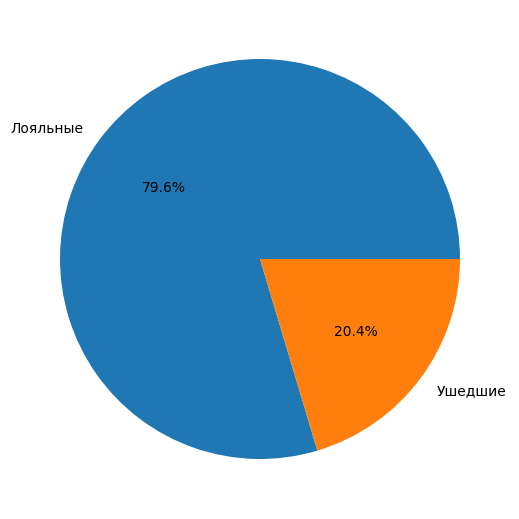

In [204]:
# Сделаем копию исходных данных
churn_data_df = churn_data.copy()
# Преобразуем таблицу, удалим лишнее
#display(churn_data_df.memory_usage())
churn_data_df['Exited'] = churn_data_df['Exited'].astype('category')
churn_data_df['Gender'] = churn_data_df['Gender'].astype('category')
churn_data_df['HasCrCard'] = churn_data_df['HasCrCard'].astype('category')
churn_data_df['IsActiveMember'] = churn_data_df['IsActiveMember'].astype('category')
#display(churn_data_df.memory_usage())
churn_data_df = churn_data_df.drop('RowNumber', axis=1)
exited_clients = churn_data_df['Exited'].value_counts()
#display(exited_clients)
groups = ['Лояльные', 'Ушедшие']
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes((1, 1, 1, 1))
ax.pie(exited_clients, labels=groups, autopct='%1.1f%%');

Из графика видно, что процент лояльных клиентов намного выше, чем ушедших.

#### 9.2 Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2500 долларов. Опишите распределение и сделайте выводы.

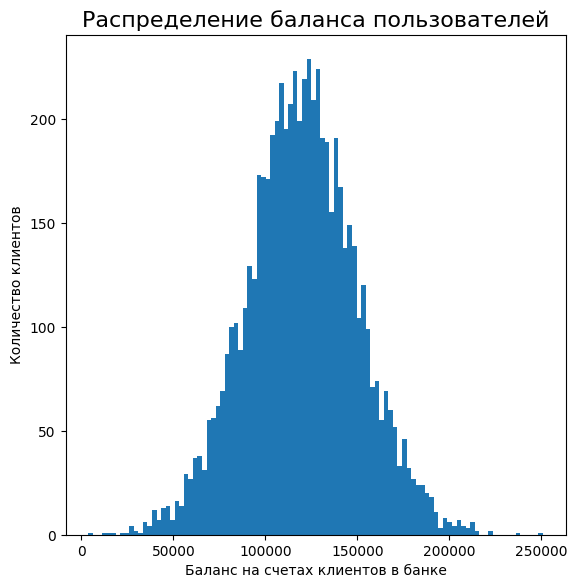

In [205]:
#display(churn_data_df['Balance'].head(15))
mask = churn_data_df['Balance']>2500
fig2 = plt.figure(figsize=(5, 5))
ax2 = fig2.add_axes((0, 0, 1, 1))
ax2.hist(churn_data_df[mask]['Balance'],bins=100);
ax2.set_title('Распределение баланса пользователей', fontsize=16);
ax2.set_xlabel('Баланс на счетах клиентов в банке');
ax2.set_ylabel('Количество клиентов');

Распределение баланса пользователей похоже на нормальное с максимумом в районе 125000 долларов. На счетах у клиентов банка в основном находится от 50000 до 200000 долларов.

#### 9.3 Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счете ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке?

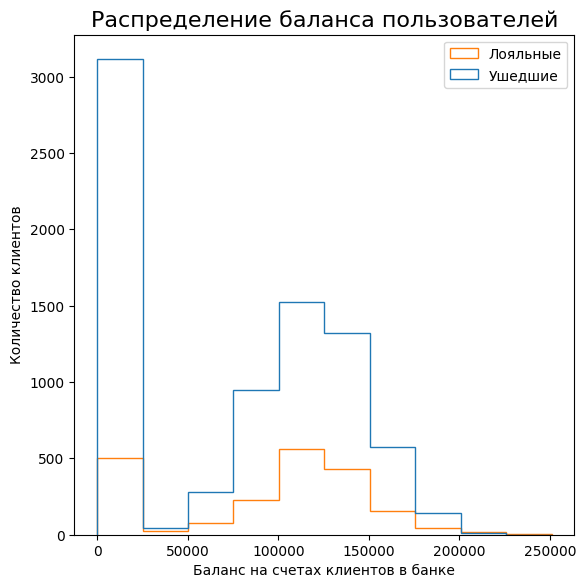

In [206]:
mask1 = churn_data_df['Exited'] == 0
mask2 = churn_data_df['Exited'] == 1
fig3 = plt.figure(figsize=(5, 5))
ax3 = fig3.add_axes((0, 0, 1, 1))
ax3.hist([churn_data_df[mask1]['Balance'], churn_data_df[mask2]['Balance']],bins=10, histtype='step',density=False);
ax3.set_title('Распределение баланса пользователей', fontsize=16);
ax3.set_xlabel('Баланс на счетах клиентов в банке');
ax3.set_ylabel('Количество клиентов');
ax3.legend(labels=['Лояльные', 'Ушедшие']);

Из графиков можно видеть, что среди ушедших клиентов много тех, у кого баланс равен 0. Это могло повлиять на их решение уйти из банка.

#### 9.4 Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

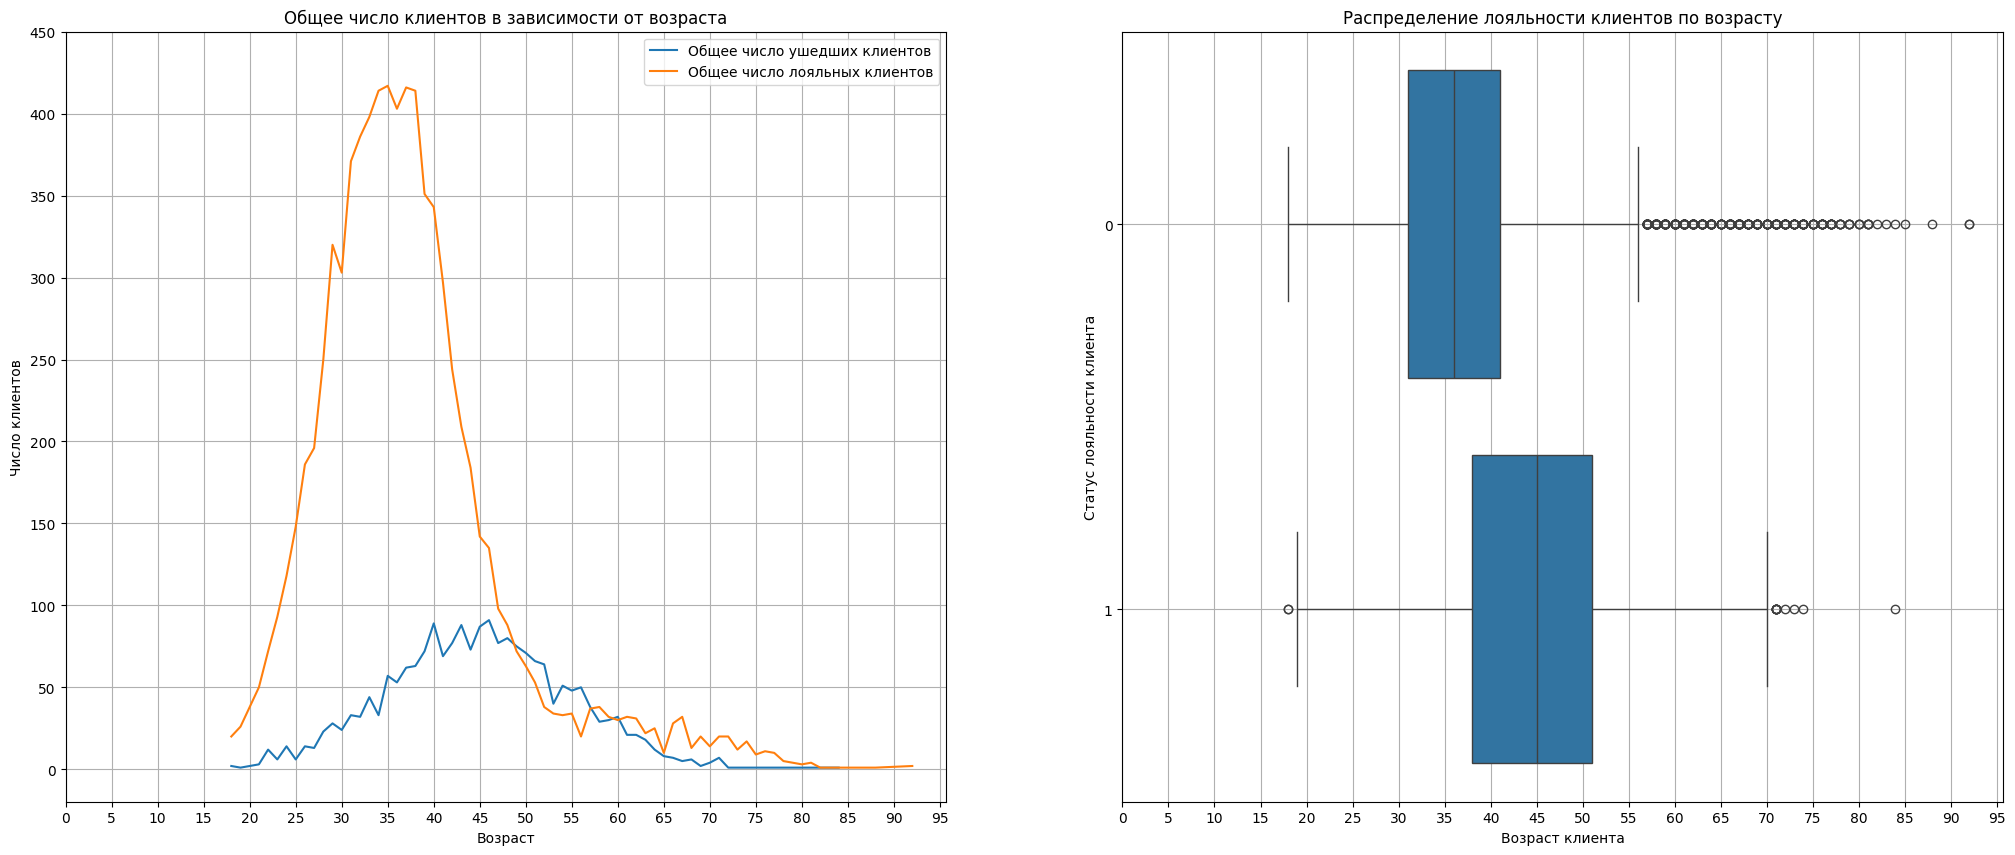

In [328]:
import seaborn as sns
mask1 = churn_data_df['Exited'] == 0
mask2 = churn_data_df['Exited'] == 1

age_of_not_exited = churn_data_df[mask1].groupby('Age')['Exited'].count()
age_of_exited = churn_data_df[mask2].groupby('Age')['Exited'].count()
#display(age_of_not_exited)

fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(25, 10))
#axes[1] = plt.boxplot([age_of_exited, age_of_not_exited],vert=False)

#fig = plt.figure(figsize=(10, 4))
#axes[0] = fig.add_axes([0,0,1,1])
axes[0].plot(age_of_exited, label='Общее число ушедших клиентов')
axes[0].plot(age_of_not_exited, label='Общее число лояльных клиентов')
axes[0].set_title('Общее число клиентов в зависимости от возраста')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Число клиентов')
axes[0].set_xticks(range(0,100,5))
axes[0].set_yticks(range(0,500,50))
axes[0].legend()
axes[0].grid()

axes[1] = sns.boxplot(churn_data_df, x='Age', y='Exited')
axes[1].set_title('Распределение лояльности клиентов по возрасту');
axes[1].set_xlabel('Возраст клиента');
axes[1].set_ylabel('Статус лояльности клиента');
axes[1].set_xticks(range(0,100,5))
axes[1].grid()

Из графиков видно, что возраст большинства клиентов лежит в диапазоне от 25 до 45 лет. Также видно, что потенциальных выбросов больше среди лояльных клиентов. Банку следует обратить внимание на возрастную категорию от 40 до 55 лет, так как среди этой категории наблюдается сильное снижение числа лояльных клиентов и наибольшее число ушедших клиентов.